In [1]:
import pandas as pd
import numpy as npr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("T:/GIT HUB PROJECTS/STOCK MARKET/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Stock Trading
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


In [7]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date']).view('int64') // 10**9

In [9]:
df

,Date,Open,High,Low,Close,Volume,Stock Trading
0,1483056000,42120,42330,41700,41830,610000,25628028000
1,1482969600,43000,43220,42540,42660,448400,19188227000
2,1482883200,43940,43970,43270,43270,339900,14780670000
3,1482796800,43140,43700,43140,43620,400100,17427993000
4,1482710400,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,1326240000,14360,14750,14280,14590,1043400,15191988000
1222,1326153600,13890,14390,13860,14390,952300,13533413000
1223,1325808000,13990,14030,13790,13850,765500,10635609000
1224,1325721600,13720,13840,13600,13800,511500,7030811000


In [10]:
correlation = df.corr()

<Axes: >

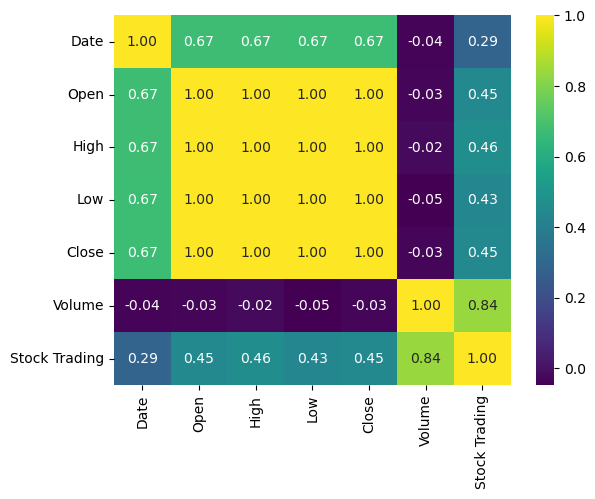

In [11]:
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='viridis')

In [12]:
x=df.drop(['Stock Trading'],axis=1)

In [13]:
y=df['Stock Trading']

In [14]:
x

,Date,Open,High,Low,Close,Volume
0,1483056000,42120,42330,41700,41830,610000
1,1482969600,43000,43220,42540,42660,448400
2,1482883200,43940,43970,43270,43270,339900
3,1482796800,43140,43700,43140,43620,400100
4,1482710400,43310,43660,43090,43340,358200
...,...,...,...,...,...,...
1221,1326240000,14360,14750,14280,14590,1043400
1222,1326153600,13890,14390,13860,14390,952300
1223,1325808000,13990,14030,13790,13850,765500
1224,1325721600,13720,13840,13600,13800,511500


In [15]:
y

0       25628028000
1       19188227000
2       14780670000
3       17427993000
4       15547803000
           ...     
1221    15191988000
1222    13533413000
1223    10635609000
1224     7030811000
1225     7719804000
Name: Stock Trading, Length: 1226, dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [17]:
sc=StandardScaler()

In [18]:
x_train_scaled=sc.fit_transform(x_train)

In [19]:
x_train_scaled

array([[ 1.38279006, -0.73787062, -0.76194421, -0.77247529, -0.74692713,
         0.65150577],
       [-0.80286144,  0.31705919,  0.2925564 ,  0.30707654,  0.30647999,
         0.76632389],
       [-0.55263941,  0.28004411,  0.25597355,  0.27434868,  0.26951834,
         0.25915034],
       ...,
       [ 0.29849461,  0.7441207 ,  0.78322385,  0.79004623,  0.81470273,
         2.88745028],
       [-0.93934618, -0.82115456, -0.83785362, -0.84120379, -0.86890058,
        -0.32841996],
       [ 0.52407356,  1.43676541,  1.48607183,  1.48153915,  1.45229125,
         2.41951228]])

In [20]:
x_test_scaled=sc.transform(x_test)

In [21]:
x_test_scaled

array([[ 0.74207002,  2.48429221,  2.45826103,  2.51293426,  2.47243288,
        -0.87097771],
       [-0.34601668,  0.78900148,  0.74984201,  0.68578462,  0.63913487,
         2.01439928],
       [ 0.86149417,  1.41455636,  1.42113727,  1.4534867 ,  1.45506337,
        -0.50558168],
       ...,
       [ 1.26715715, -0.53983994, -0.55525111, -0.58078354, -0.55103036,
         0.47699185],
       [-0.29104365,  0.22452149,  0.20704399,  0.22759459,  0.18958877,
         0.65728278],
       [-1.32226171, -1.55035166, -1.52926946, -1.52942392, -1.51295739,
         0.0052025 ]])

In [22]:
linear_model = LinearRegression()

In [23]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [24]:
linear_model.score(x_test,y_test)

0.9658609935132467

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
y_predict = linear_model.predict(x_test)

In [27]:
mse = mean_squared_error(y_predict,y_test)

In [28]:
mse

8.083019904336979e+18

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rtf = RandomForestRegressor()

In [31]:
rtf.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
rtf.score(x_test,y_test)

0.9897954454879331

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
model = DecisionTreeRegressor()

In [35]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
model.score(x_test,y_test)

0.9746784309571099

In [37]:
from xgboost import XGBRegressor

In [38]:
model_xg=XGBRegressor()

In [39]:
model_xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
model_xg.score(x_test,y_test)

0.9648731480982295

In [43]:
rtf.predict([[1482883200,43940,43970,43270,43270,339900]])

C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.48200912e+10])

In [42]:
x

,Date,Open,High,Low,Close,Volume
0,1483056000,42120,42330,41700,41830,610000
1,1482969600,43000,43220,42540,42660,448400
2,1482883200,43940,43970,43270,43270,339900
3,1482796800,43140,43700,43140,43620,400100
4,1482710400,43310,43660,43090,43340,358200
...,...,...,...,...,...,...
1221,1326240000,14360,14750,14280,14590,1043400
1222,1326153600,13890,14390,13860,14390,952300
1223,1325808000,13990,14030,13790,13850,765500
1224,1325721600,13720,13840,13600,13800,511500
